In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/chess_board_recognizer/chess_board_recognizer/create_model/

/content/drive/MyDrive/Colab Notebooks/chess_board_recognizer/chess_board_recognizer/create_model


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Diretório do script
HERE = sys.path[0]

In [5]:
train_path = os.path.join(HERE, '..', 'cell_dataset', 'train')
test_path = os.path.join(HERE, '..', 'cell_dataset', 'test')

In [6]:
batch_size = 16
color_mode = 'grayscale'
image_shape = (100,100, 1)

In [7]:
train_image_gen = image_dataset_from_directory(train_path,
                                                image_size=image_shape[:2],
                                                color_mode=color_mode,
                                                batch_size=batch_size)

Found 6000 files belonging to 6 classes.


In [8]:
test_image_gen = image_dataset_from_directory(test_path,
                                                image_size=image_shape[:2],
                                                color_mode=color_mode,
                                                batch_size=batch_size)

Found 1200 files belonging to 6 classes.


In [11]:
try:
  del model
except Exception as e:
  pass

In [12]:
# TODO: Testar com dropout
model = Sequential()
model.add(Conv2D(12, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=image_shape))
#model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 12)        120       
_________________________________________________________________
flatten_1 (Flatten)          (None, 115248)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               57624500  
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 606       
Total params: 57,675,326
Trainable params: 57,675,326
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=3)

In [15]:
results = model.fit_generator(train_image_gen,epochs=30,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/30
375/375 [==============================] - 821s 2s/step - loss: 461.4508 - accuracy: 0.6120 - val_loss: 84.8872 - val_accuracy: 0.7317
Epoch 2/30
375/375 [==============================] - 15s 40ms/step - loss: 33.4236 - accuracy: 0.8638 - val_loss: 37.8068 - val_accuracy: 0.8508
Epoch 3/30
375/375 [==============================] - 15s 41ms/step - loss: 10.7997 - accuracy: 0.9393 - val_loss: 12.6943 - val_accuracy: 0.9158
Epoch 4/30
375/375 [==============================] - 15s 41ms/step - loss: 5.4078 - accuracy: 0.9593 - val_loss: 12.2862 - val_accuracy: 0.9242
Epoch 5/30
375/375 [==============================] - 15s 41ms/step - loss: 2.0397 - accuracy: 0.9777 - val_loss: 11.4600 - val_accuracy: 0.9325
Epoch 6/30
375/375 [==============================] - 15s 41ms/step - loss: 1.5883 - accuracy: 0.9793 - val_loss: 10.3190 - val_accuracy: 0.9275
Epoch 7/30
375/375 [==============================] - 15s 41ms/step - loss: 1.7761 - accuracy: 0.9793 - val_loss: 12.6568 - val

In [135]:
images = []
labels = []
classes = train_image_gen.class_names

In [136]:
for i in train_image_gen:
  for img in i[0]:
    arr = img.numpy().reshape(100, 100)
    images.append(arr.copy())
  labels.extend(i[1].numpy())
  break


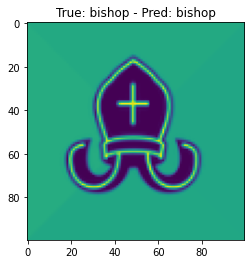

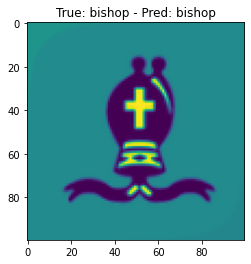

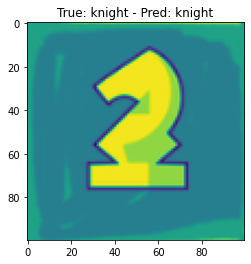

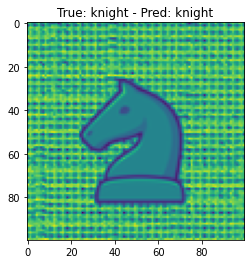

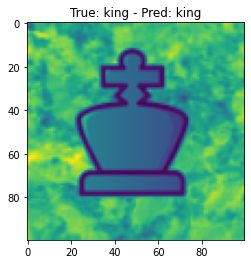

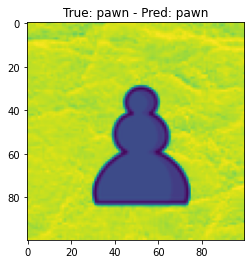

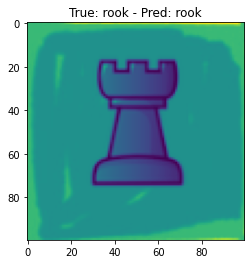

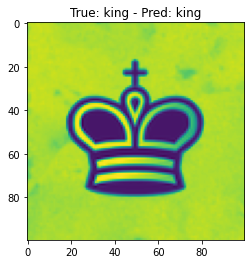

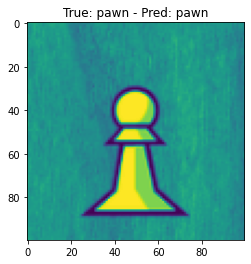

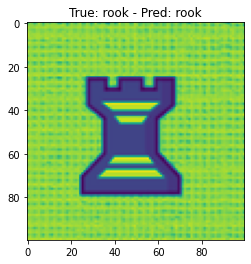

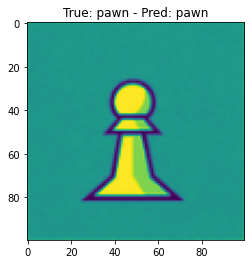

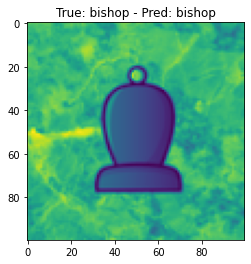

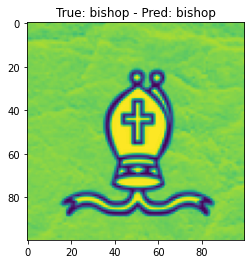

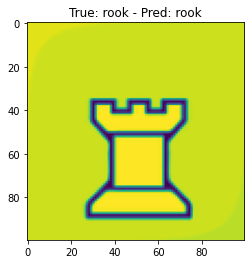

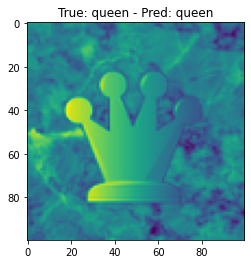

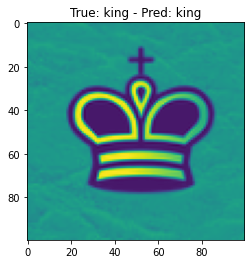

In [156]:
for i in range(len(images)):
  plt.figure()
  pred = model.predict_classes(images[i].reshape(1,100,100,1))[0]
  plt.title(f'True: {classes[labels[i]]} - Pred: {classes[pred]}')
  plt.imshow(images[i])

In [158]:
images = []
labels = []
preds = []
classes = train_image_gen.class_names

In [159]:
for i in train_image_gen:
  for img in i[0]:
    arr = img.numpy().reshape(100, 100)
    images.append(arr.copy())
    pred = model.predict_classes(arr.reshape(1,100,100,1))[0]
    preds.append(pred)
  labels.extend(i[1].numpy())

In [162]:
print(len(labels))
print(len(preds))

6000
6000


In [169]:
import sklearn

print(sklearn.metrics.classification_report(labels, preds, target_names=classes))

              precision    recall  f1-score   support

      bishop       0.98      0.99      0.99      1000
        king       1.00      0.98      0.99      1000
      knight       0.96      0.99      0.98      1000
        pawn       0.99      0.97      0.98      1000
       queen       0.99      1.00      0.99      1000
        rook       1.00      0.98      0.99      1000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [167]:
classes

['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']

In [170]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [172]:
cm = sklearn.metrics.confusion_matrix(labels, preds)

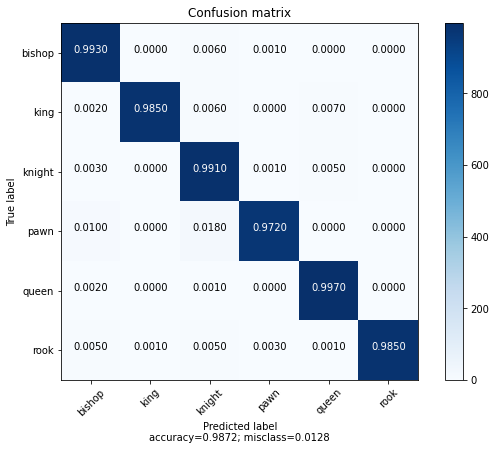

In [174]:
plot_confusion_matrix(cm, target_names=classes)